# Estimating instantaneous phase, amplitude, and frequency over time

In [1]:
import numpy as np
from neurodsp.timefrequency import amp_by_time, freq_by_time, phase_by_time

%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import matplotlib.pyplot as plt

### Load a neural signal

Text(0, 0.5, 'Voltage (uV)')

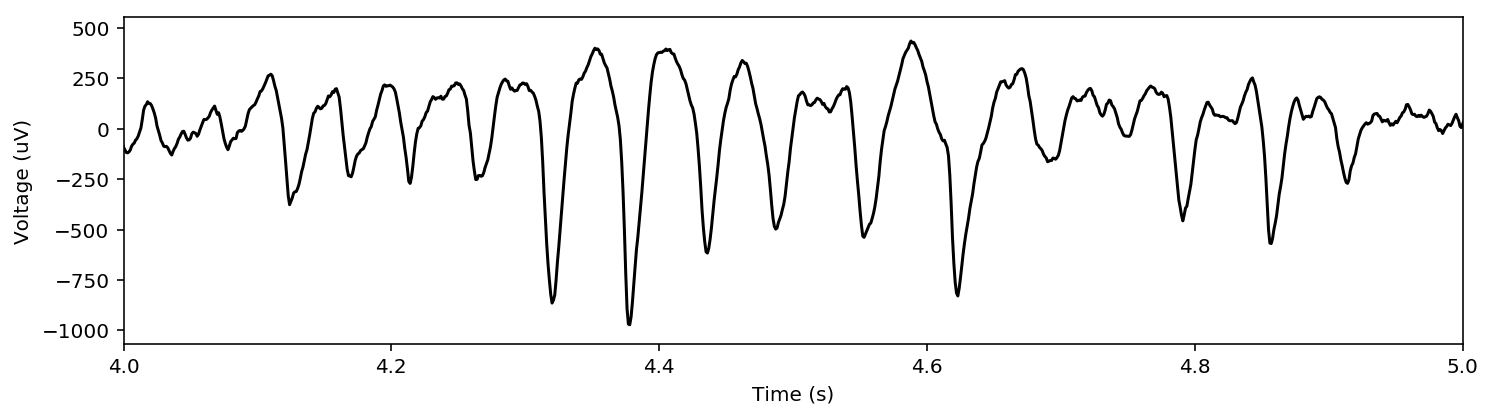

In [2]:
# Load signal
sig = np.load('./data/sample_data_1.npy')
sig_filt_true = np.load('./data/sample_data_1_filt.npy')
Fs = 1000
t = np.arange(0, len(sig)/Fs, 1/Fs)
f_range = (13,30)

# Plot example signal
plt.figure(figsize=(12,3))
plt.plot(t, sig, 'k')
plt.xlim((4,5))
plt.xlabel('Time (s)')
plt.ylabel('Voltage (uV)')

# Estimate phase of the beta oscillation over time

Transition bandwidth is 5.9 Hz. Pass/stop bandwidth is 17 Hz


Text(0, 0.5, 'Phase (rad)')

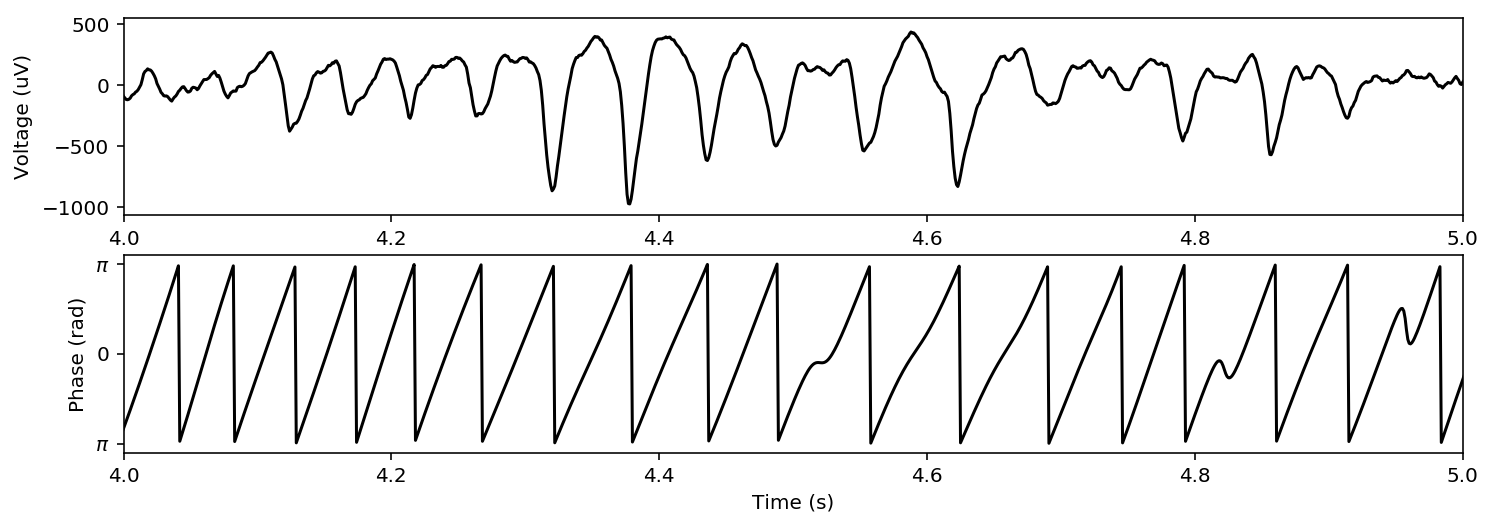

In [3]:
pha = phase_by_time(sig, Fs, f_range)

# Plot example signal
plt.figure(figsize=(12,4))
plt.subplot(2,1,1)
plt.plot(t, sig, 'k')
plt.xlim((4,5))
plt.ylabel('Voltage (uV)')
plt.subplot(2,1,2)
plt.plot(t, pha, 'k')
plt.xlim((4,5))
plt.yticks([-np.pi, 0, np.pi], ['$\pi$',0,'$\pi$'])
plt.xlabel('Time (s)')
plt.ylabel('Phase (rad)')

# Estimate amplitude of beta oscillation over time

Transition bandwidth is 5.9 Hz. Pass/stop bandwidth is 17 Hz


Text(0, 0.5, 'Voltage (uV)')

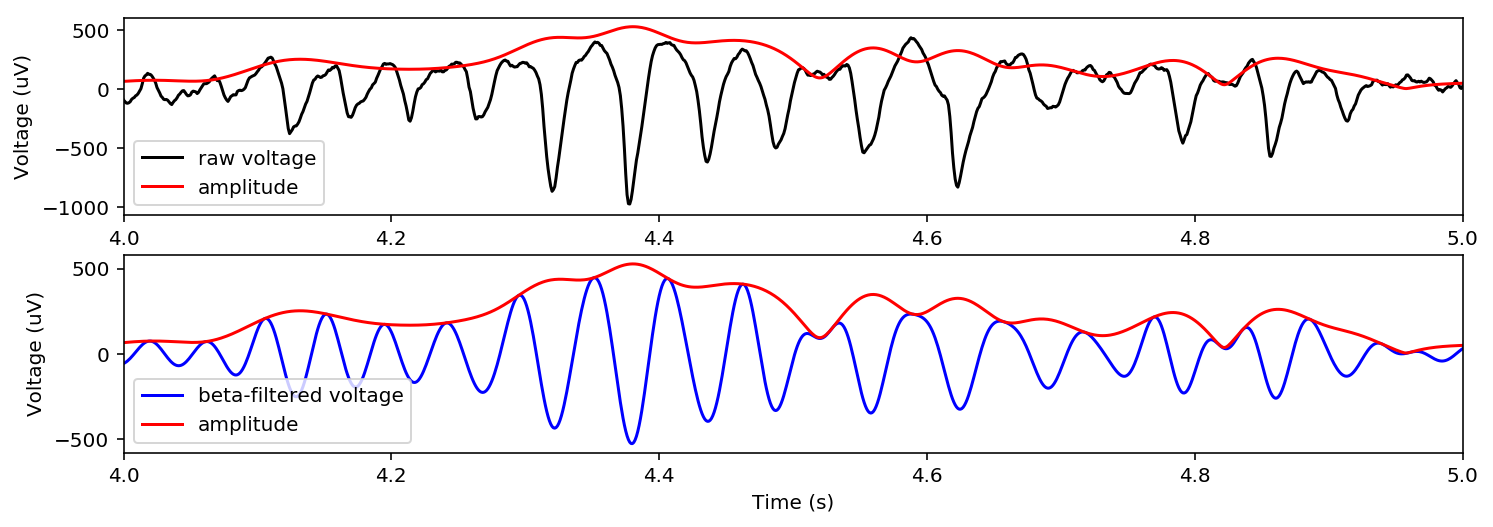

In [4]:
amp = amp_by_time(sig, Fs, f_range)

# Plot example signal
plt.figure(figsize=(12,4))
plt.subplot(2,1,1)
plt.plot(t, sig, 'k', label='raw voltage')
plt.plot(t, amp, 'r', label='amplitude')
plt.legend(loc='best')
plt.xlim((4,5))
plt.ylabel('Voltage (uV)')
plt.subplot(2,1,2)
plt.plot(t, sig_filt_true, 'b', label='beta-filtered voltage')
plt.plot(t, amp, 'r', label='amplitude')
plt.legend(loc='best')
plt.xlim((4,5))
plt.xlabel('Time (s)')
plt.ylabel('Voltage (uV)')

# Estimate instantaneous frequency over time

/gh/bv/neurodsp/neurodsp/timefrequency.py:158: RuntimeWarning: invalid value encountered in less
  phadiff[phadiff < 0] = phadiff[phadiff < 0] + 2 * np.pi
No handles with labels found to put in legend.


Transition bandwidth is 5.9 Hz. Pass/stop bandwidth is 17 Hz


(10, 30)

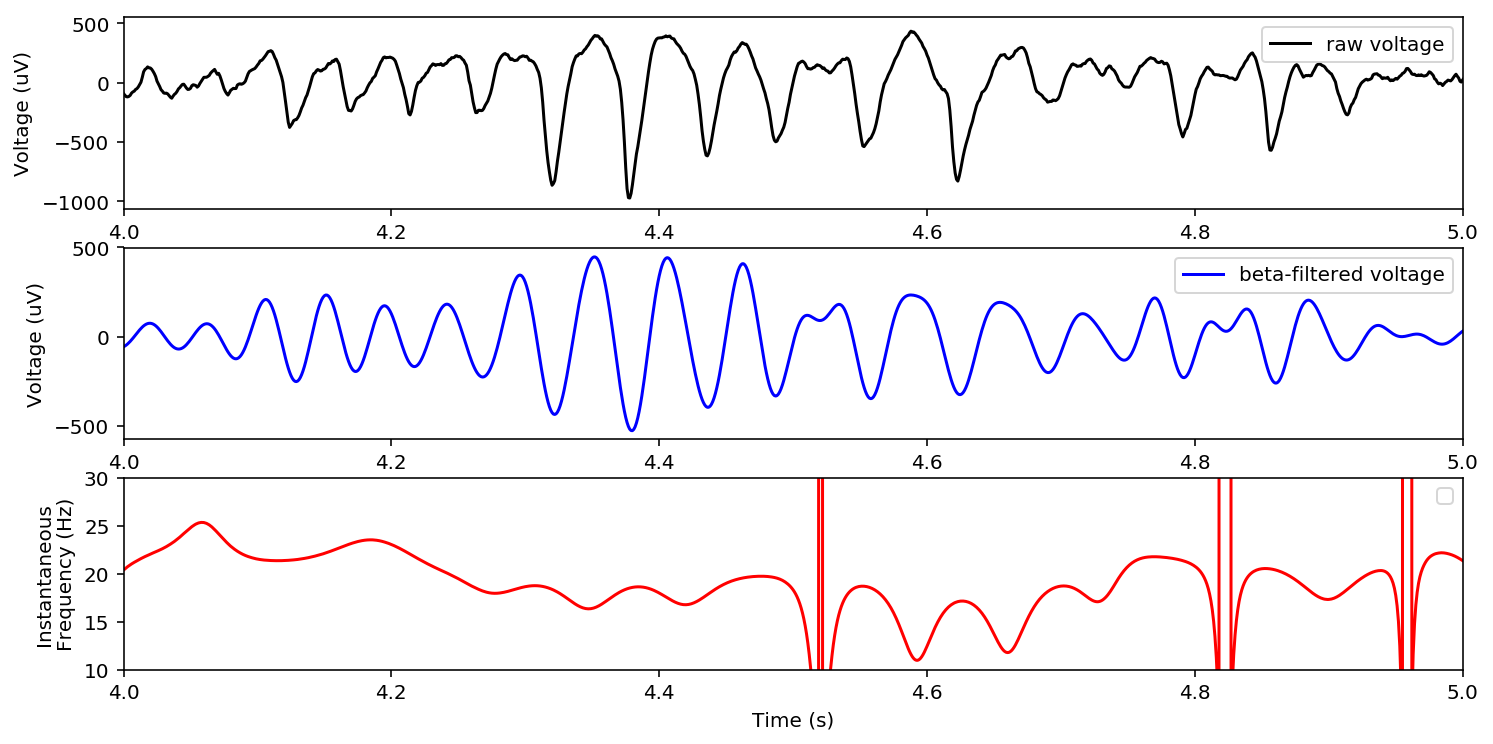

In [5]:
i_f = freq_by_time(sig, Fs, f_range)

# Plot example signal
plt.figure(figsize=(12,6))
plt.subplot(3,1,1)
plt.plot(t, sig, 'k', label='raw voltage')
plt.legend(loc='best')
plt.ylabel('Voltage (uV)')
plt.xlim((4,5))
plt.subplot(3,1,2)
plt.plot(t, sig_filt_true, 'b', label='beta-filtered voltage')
plt.legend(loc='best')
plt.ylabel('Voltage (uV)')
plt.xlim((4,5))
plt.subplot(3,1,3)
plt.plot(t, i_f, 'r')
plt.legend(loc='best')
plt.xlim((4,5))
plt.xlabel('Time (s)')
plt.ylabel('Instantaneous\nFrequency (Hz)')
plt.ylim((10,30))